# Part 1. Problem and Reference Answer

## 1.1 The Problem
- The Information Center has set up a network to allow data uploads between servers. This network can be represented by a set of permitted directed transmissions, where a permitted directed transmission from server 𝑎_𝑖 to server 𝑏_𝑖 can be formulated as [𝑎_𝑖,𝑏_𝑖]. It’s given that 0≤𝑎_𝑖, 𝑏_𝑖<𝑛, 𝑎_𝑖≠𝑏_𝑖. There are 𝑛 (𝑛≥2) servers in the network with with server 0 being the central server. The number of directed transmissions is less than 𝑛.
- The Information Center plans to update this network. The objective is to ensure the central server (0) can receive data uploads from every other server in the network. Your task is to reorient some of these permitted transmissions so that the central server can receive data from other servers. Return the minimum number of transmission changes required.
- If it's not feasible to enable the central server to receive data from other servers by adjusting the directions of existing permitted transmissions, then return -1.

Example 1:
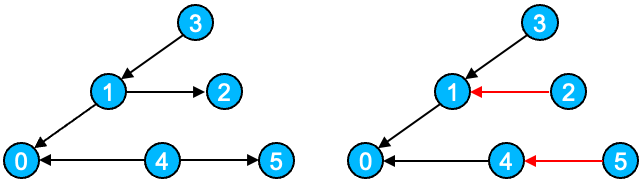
- Demo input: transmissions = [[1, 0], [3, 1], [1, 2], [4,0], [4,5]], num_servers = 6
- Expected output: 2
- Transmission changes are demonstrated in red lines to ensure the central server can receive data from all the other servers.

Example 2:
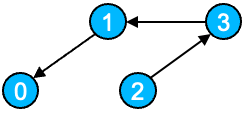
- Demo input: transmissions = [[1, 0], [3, 1], [2, 3]], num_servers = 4
- Expected output: 0
- No transmission route changes are needed, the central server can already receive data from all other servers.

Please use the following Python template for submission.
Your program will be tested on other test cases.
```
import networkx as nx
from typing import List
def solve(transmissions: List[List[int]], num_servers: int) -> int:
"""Your solution to the problem goes in this function.
Args:
transmissions (List[List[int]]): The permitted transmission between servers,
e.g., [[1, 0], [3, 1], [1, 2], [4,0], [4,5]]
num_servers (int): The number of servers in the network, e.g., 6
Returns:
int: the minimum number of transmission changes required, e.g., 2
"""
return -2

# test case 1
transmissions = [[1, 0], [3, 1], [1, 2], [4,0], [4,5]]
num_servers = 6
answer = 2
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 1: expected {answer}, got {result}"
print('Passed test case 1...')

# test case 2
transmissions = [[1, 0], [3, 1], [2, 3]]
num_servers = 4
answer = 0
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 2: expected {answer}, got {result}"
print('Passed test case 2...')
```

## 1.2 An Example Algorithm

You may need to revise the generated code. Here is what I finally got.

1. Initialize a directed graph
2. Add nodes for each server
3. Add directed edges based on transmissions
4. Check if all nodes are reachable from node 0 (i.e., the graph is weakly connected)
5. Assign a weight of 1 to all edges, indicating a change is needed, to allow the `edge[0]` to receive from the `edge[1]`
6. Add reverse edges with a weight of 0, indicating no change is needed, for the `edge[0]` to receive from `edge[1]`
7. Determine the shortest paths for node 0 to receive from other servers
8. Collect edges in the shortest paths and their associated weights (indicating change cost)

## 1.3 Refernce Code

In [ ]:
def solve(transmissions: List[List[int]], num_servers: int) -> int:
    """
    Your solution to the problem goes in this function.

    Args:
        transmissions (List[List[int]]): The permitted transmission between servers,
        e.g., [[1, 0], [3, 1], [1, 2], [4,0], [4,5]]
        num_servers (int): The number of servers in the network, e.g., 6

    Returns:
        int: the minimum number of transmission changes required, e.g., 2
    """
    # 1. Initialize a directed graph
    G = nx.DiGraph()

    # 2. Add nodes for each server
    for i in range(num_servers):
        G.add_node(i)

    # 3. Add directed edges based on transmissions
    for edge in transmissions:
        G.add_edge(edge[0], edge[1])

    # 4. Check if all nodes are reachable from node 0 (i.e., the graph is weakly connected)
    if not nx.is_weakly_connected(G):
        return -1

    # 5. Assign a weight of 1 to all edges, indicating a change is needed, to allow the `edge[0]` to receive from the `edge[1]`
    for edge in G.edges:
        G.edges[edge]["weight"] = 1

    # 6. Add reverse edges with a weight of 0, indicating no change is needed, for the `edge[0]` to receive from `edge[1]`
    for edge in transmissions:
        G.add_edge(edge[1], edge[0], weight=0)

    # 7. Determine the shortest paths for node 0 to receive from other servers
    paths = nx.single_source_dijkstra_path(G, 0)
    weights = nx.single_source_dijkstra_path_length(G, 0)

    # 8. Collect edges in the shortest paths and their associated weights (indicating change cost)
    edges_in_path = set()
    for target, path in paths.items():
        for i in range(len(path) - 1):
            edge = (path[i], path[i + 1])
            weight = G.edges[edge]["weight"]
            edges_in_path.add((edge, weight))

    total_weight = sum(weight for edge, weight in edges_in_path)

    return total_weight


# test case 1
transmissions = [[1, 0], [3, 1], [1, 2], [4,0], [4,5]]
num_servers = 6
answer = 2
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 1: expected {answer}, got {result}"
print('Passed test case 1...')

# test case 2
transmissions = [[1, 0], [3, 1], [2, 3]]
num_servers = 4
answer = 0
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 2: expected {answer}, got {result}"
print('Passed test case 2...')

# Part 2. Demo of Interactions with ChatGPT

You can use either of the approaches to interact with ChatGPT:
- Access https://genai.polyu.edu.hk/ to interact with ChatGPT.
- Use OpenAI API to interact with ChatGPT via code.

## 2.1 Preparations

In [4]:
%%capture

import numpy as np
import networkx as nx

from typing import List

# Set the seed
def seed_everything(seed=0):
    np.random.seed(seed)
seed_everything()

# Install OpenAI package
!pip install openai

# Import OpenAI and set the API key
import openai
openai.api_key = 'OpenAI_API_Key' # Replace with your own OpenAI API Key

# Define the function of get response from ChatGPT
_messages = []
def get_completion(prompt, model="gpt-3.5-turbo-0613"):
    _messages.append({"role": "user", "content": prompt})
    response = openai.ChatCompletion.create(
        model=model,
        messages=_messages,
        temperature=0.0,  # this is the degree of randomness of the model's output
    )
    content = response.choices[0].message["content"]
    _messages.append({"role": "assistant", "content": content})
    return content


# Set display format
import html
from IPython.core.display import display, HTML
css_content = """.cs-message{box-sizing:border-box;font-size:1em;font-family:Helvetica Neue,Segoe UI,Helvetica,Arial,sans-serif;color:#000000de;display:flex;flex-direction:row;padding:0;background-color:transparent;overflow:hidden;border-radius:0}.cs-message:not(:only-child){margin:.2em 0 0}.cs-message__avatar{box-sizing:border-box;margin:0 8px 0 0;display:flex;flex-direction:column;justify-content:flex-end;width:42px}.cs-message__content-wrapper{box-sizing:border-box;display:flex;flex-direction:column}.cs-message__content{box-sizing:border-box;color:#000000de;background-color:#c6e3fa;margin-top:0;padding:.6em .9em;border-radius:.7em;white-space:pre-wrap;overflow-wrap:anywhere;word-break:break-word;font-family:Helvetica Neue,Segoe UI,Helvetica,Arial,sans-serif;font-weight:400;font-size:.91em;font-variant:normal}.cs-message--incoming{color:#000000de;background-color:transparent;margin-right:auto}.cs-message--incoming .cs-message__avatar{margin:0 8px 0 0}.cs-message--incoming .cs-message__content{color:#000000de;background-color:#c6e3fa;border-radius:0 .7em .7em 0}.cs-message--outgoing{color:#000000de;background-color:transparent;margin-left:auto;justify-content:flex-end}.cs-message--outgoing .cs-message__avatar{order:1;margin:0 0 0 8px}.cs-message--outgoing .cs-message__content{color:#000000de;background-color:#6ea9d7;border-radius:.7em 0 0 .7em}.cs-message.cs-message--incoming.cs-message--single{border-radius:0}.cs-message.cs-message--incoming.cs-message--single:not(:first-child){margin-top:.4em}.cs-message.cs-message--incoming.cs-message--single .cs-message__content{border-radius:0 .7em .7em}.cs-message.cs-message--outgoing.cs-message--single{border-radius:0}.cs-message.cs-message--outgoing.cs-message--single .cs-message__content{border-radius:.7em .7em 0}.cs-avatar{position:relative;width:42px;height:42px;border-radius:50%;box-sizing:border-box}.cs-avatar>img{box-sizing:border-box;width:100%;height:100%;border-radius:50%}.cs-avatar.cs-avatar--md{width:42px;height:42px;min-width:42px;min-height:42px
"""
html_content = """
    <section aria-label="User" class="cs-message cs-message--outgoing cs-message--single" data-cs-message="">
        <div class="cs-message__avatar">
            <div class="cs-avatar cs-avatar--md"><img src="https://genai.polyu.edu.hk/assets/user-8c5a41ea.png" alt="PolyU"> </div>
        </div>
        <div class="cs-message__content-wrapper">
            <div class="cs-message__content">
                <div class="cs-message__custom-content">hello</div>
            </div>
        </div>
    </section>
    <section aria-label="ChatGPT" class="cs-message cs-message--incoming cs-message--single" data-cs-message="">
        <div class="cs-message__avatar">
            <div class="cs-avatar cs-avatar--md"><img src="https://genai.polyu.edu.hk/assets/chatbot-08b96590.png" alt="PolyU"> </div>
        </div>
        <div class="cs-message__content-wrapper">
            <div class="cs-message__content">
                <div class="cs-message__custom-content">Hello! How can I assist you today?</div>
            </div>
        </div>
    </section>
"""
def generate_html(messages, n=2):
    if n is not None:
      messages = messages[-n:]

    html_parts = []
    user_template = """
    <section aria-label="User" class="cs-message cs-message--outgoing cs-message--single" data-cs-message="">
        <div class="cs-message__avatar">
            <div class="cs-avatar cs-avatar--md"><img src="https://genai.polyu.edu.hk/assets/user-8c5a41ea.png" alt="PolyU"> </div>
        </div>
        <div class="cs-message__content-wrapper">
            <div class="cs-message__content">
                <div class="cs-message__custom-content">{content}</div>
            </div>
        </div>
    </section>
    """

    assistant_template = """
    <section aria-label="ChatGPT" class="cs-message cs-message--incoming cs-message--single" data-cs-message="">
        <div class="cs-message__avatar">
            <div class="cs-avatar cs-avatar--md"><img src="https://genai.polyu.edu.hk/assets/chatbot-08b96590.png" alt="PolyU"> </div>
        </div>
        <div class="cs-message__content-wrapper">
            <div class="cs-message__content">
                <div class="cs-message__custom-content">{content}</div>
            </div>
        </div>
    </section>
    """

    for message in messages:
        sanitized_content = html.escape(message["content"])
        if message["role"] == "user":
            html_parts.append(user_template.format(content=sanitized_content))
        elif message["role"] == "assistant":
            html_parts.append(assistant_template.format(content=sanitized_content))

    return "".join(html_parts) + f"<style>{css_content}</style>"

## 2.2 Interact with ChatGPT

In [5]:
problem = '''
The Information Center has set up a network to allow data uploads between servers.
This network can be represented by a set of permitted directed transmissions,
where a permitted directed transmission from server a_i to server b_i can be formulated as [a_i,b_i].
It’s given that 0≤a_i,b_i<n,a_i≠b_i. There are n (n≥2) servers in the network with with server 0 being the central server.
The number of directed transmissions is less than n. The Information Center plans to update this network.
The objective is to ensure the central server (0) can receive data uploads from every other server in the network.
Your task is to reorient some of these permitted transmissions so that the central server can receive data from other servers.
Return the minimum number of transmission changes required.
If it's not feasible to enable the central server to receive data from other servers by adjusting the directions of existing permitted transmissions,
then return -1.
'''
example = '''
Example 1: Demo input: transmissions = [[1, 0], [3, 1], [1, 2], [4,0], [4,5]], num_servers = 6
Expected output: 2 Transmission changes are demonstrated in red lines to ensure the central server can receive data from all the other servers.
'''
prompt = '''
{problem}
{example}
Let’s think step by step.
'''

message = prompt.format(problem=problem, example=example)
response = get_completion(message)

html_content = generate_html(_messages)
display(HTML(html_content))

In [6]:
# you can ask ChatGPT many times to get your own idea
idea = '''
Check if all nodes are reachable from node 0 (i.e., the graph is weakly connected)
Assign a weight of 1 to all edges, indicating a change is needed, to allow the `edge[0]` to receive from the `edge[1]`
Add reverse edges with a weight of 0, indicating no change is needed, for the `edge[0]` to receive from `edge[1]`
Determine the shortest paths for node 0 to receive from other servers
Collect edges in the shortest paths and their associated weights (indicating change cost)
'''
prompt = '''
I will use the following idea:
{idea}
'''

message = prompt.format(idea=idea)
response = get_completion(message)

html_content = generate_html(_messages)
display(HTML(html_content))

In [7]:
prompt = '''
Use Python and the networkx library to complete the code. Then, add necessary comments to explain the code.
'''
message = prompt.format(message=message, response=response)
response = get_completion(message)

html_content = generate_html(_messages)
display(HTML(html_content))

In [8]:
from IPython.core.display import HTML

template = '''
import networkx as nx
from typing import List

def solve(transmissions: List[List[int]], num_servers: int) -> int:
    """
    Your solution to the problem goes in this function.

    Args:
        transmissions (List[List[int]]): The permitted transmission between servers,
        e.g., [[1, 0], [3, 1], [1, 2], [4,0], [4,5]]
        num_servers (int): The number of servers in the network, e.g., 6

    Returns:
        int: the minimum number of transmission changes required, e.g., 2
    """
    return -2

# test case 1
transmissions = [[1, 0], [3, 1], [1, 2], [4, 0], [4, 5]]
num_servers = 6
answer = 2
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 1: expected {answer}, got {result}"
print('Passed test case 1...')

# test case 2
transmissions = [[1, 0], [3, 1], [2, 3]]
num_servers = 4
answer = 0
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 2: expected {answer}, got {result}"
print('Passed test case 2...')

# test case 3
transmissions = [[1, 0], [0, 2], [3, 4]]
num_servers = 5
answer = -1
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 3: expected {answer}, got {result}"
print('Passed test case 3...')
'''
prompt = '''
Use the given code snippet to revise the code.
{template}
'''
message = prompt.format(template=template)
response = get_completion(message)

html_content = generate_html(_messages)
display(HTML(html_content))

## 2.3 The Resulting Algorithm

You may need to revise the generated code. Here is what I finally got.

1. Initialize a directed graph
2. Add nodes for each server
3. Add directed edges based on transmissions
4. Check if all nodes are reachable from node 0 (i.e., the graph is weakly connected)
5. Assign a weight of 1 to all edges, indicating a change is needed, to allow the `edge[0]` to receive from the `edge[1]`
6. Add reverse edges with a weight of 0, indicating no change is needed, for the `edge[0]` to receive from `edge[1]`
7. Determine the shortest paths for node 0 to receive from other servers
8. Collect edges in the shortest paths and their associated weights (indicating change cost)

In [ ]:
def solve(transmissions: List[List[int]], num_servers: int) -> int:
    """
    Your solution to the problem goes in this function.

    Args:
        transmissions (List[List[int]]): The permitted transmission between servers,
        e.g., [[1, 0], [3, 1], [1, 2], [4,0], [4,5]]
        num_servers (int): The number of servers in the network, e.g., 6

    Returns:
        int: the minimum number of transmission changes required, e.g., 2
    """
    # 1. Initialize a directed graph
    G = nx.DiGraph()

    # 2. Add nodes for each server
    for i in range(num_servers):
        G.add_node(i)

    # 3. Add directed edges based on transmissions
    for edge in transmissions:
        G.add_edge(edge[0], edge[1])

    # 4. Check if all nodes are reachable from node 0 (i.e., the graph is weakly connected)
    if not nx.is_weakly_connected(G):
        return -1

    # 5. Assign a weight of 1 to all edges, indicating a change is needed, to allow the `edge[0]` to receive from the `edge[1]`
    for edge in G.edges:
        G.edges[edge]["weight"] = 1

    # 6. Add reverse edges with a weight of 0, indicating no change is needed, for the `edge[0]` to receive from `edge[1]`
    for edge in transmissions:
        G.add_edge(edge[1], edge[0], weight=0)

    # 7. Determine the shortest paths for node 0 to receive from other servers
    paths = nx.single_source_dijkstra_path(G, 0)
    weights = nx.single_source_dijkstra_path_length(G, 0)

    # 8. Collect edges in the shortest paths and their associated weights (indicating change cost)
    edges_in_path = set()
    for target, path in paths.items():
        for i in range(len(path) - 1):
            edge = (path[i], path[i + 1])
            weight = G.edges[edge]["weight"]
            edges_in_path.add((edge, weight))

    total_weight = sum(weight for edge, weight in edges_in_path)

    return total_weight

# Part 3. Test cases

## Your local test cases

In [ ]:
# test case 1
transmissions = [[1, 0], [3, 1], [1, 2], [4, 0], [4, 5]]
num_servers = 6
answer = 2
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 1: expected {answer}, got {result}"
print('Passed test case 1...')

In [ ]:
# test case 2
transmissions = [[1, 0], [3, 1], [2, 3]]
num_servers = 4
answer = 0
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 2: expected {answer}, got {result}"
print('Passed test case 2...')

In [ ]:
# test case 3
transmissions = [[1, 0], [0, 2], [3, 4]]
num_servers = 5
answer = -1
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 3: expected {answer}, got {result}"
print('Passed test case 3...')

## Private test cases

In [ ]:
def mock(num_servers, num_reversed=None, num_removed=0):
    # Create a complete graph with num_servers nodes using NetworkX and assign random weights to the edges
    G = nx.complete_graph(num_servers)
    for edge in G.edges:
        G.edges[edge]["weight"] = np.random.randint(0, 10)

    # Compute the minimum spanning tree of the graph using Prim's algorithm
    T = nx.minimum_spanning_tree(G)

    # Starting from node 0, traverse all nodes. If there's an edge, add it to transmissions
    # Direction is from neighbor node to current node
    transmissions = []
    visited = set()
    nodes_to_visit = [0]
    while nodes_to_visit:
        current_node = nodes_to_visit.pop()
        visited.add(current_node)

        for neighbor in T.neighbors(current_node):
            if neighbor not in visited:
                transmissions.append((neighbor, current_node))
                nodes_to_visit.append(neighbor)

    # Randomly remove some transmissions
    if num_removed > 0:
        removed_edge_indices = np.random.choice(len(transmissions), num_removed, replace=False)
        transmissions = [edge for i, edge in enumerate(transmissions) if i not in removed_edge_indices]
        return transmissions, -1

    # Randomly reverse some transmissions' direction
    if num_reversed is None:
        num_reversed = np.random.randint(0, num_servers)
    assert num_reversed <= num_servers - 1

    transmissions_r = []
    reversed_edge_indices = np.random.choice(len(transmissions), num_reversed, replace=False)

    for edge in transmissions:
        if transmissions.index(edge) in reversed_edge_indices:
            transmissions_r.append(edge[::-1])
        else:
            transmissions_r.append(edge)

    return transmissions_r, num_reversed


In [ ]:
num_servers = 10
transmissions, answer = mock(num_servers)
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 1: expected {answer}, got {result}"
print('Passed test case 1...')

In [ ]:
num_servers = 20
answer = 0
transmissions, answer = mock(num_servers, answer)
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 1: expected {answer}, got {result}"
print('Passed test case 2...')

In [ ]:
num_servers = 30
answer = -1
transmissions, answer = mock(num_servers, num_removed=1)
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 1: expected {answer}, got {result}"
print('Passed test case 3...')